In [2]:
import mysql.connector  # Importar el conector de MySQL
import pandas as pd
#import plost
import streamlit as st
import matplotlib.pyplot as plt
import plotly.express as px
from dotenv import load_dotenv
import os
from pydataxm import *          # Importa la libreria que fue instalada con pip install pydataxm o tambien desde GitHub
from pydataxm.pydataxm import ReadDB as apiXM    #Se importa la clase que invoca el servicio
import datetime as dt           # Permite trabajar con fechas 
import numpy as np              # Manipulación de datos
import matplotlib.dates as mdates
      

In [3]:
objetoAPI = pydataxm.ReadDB()     # Construir la clase que contiene los métodos de pydataxm
objetoAPI.get_collections('DemaCome') # Revisar los cruces disponibles para generación real
objetoAPI.get_collections('MercadoComercializacion') #Listado de plantas registradas ante el CND
df_demanda = objetoAPI.request_data('DemaCome',
                                       'MercadoComercializacion',
                                       dt.date(2021,1,1),
                                       dt.date(2023,12,31))


# Asegúrate de que la columna 'Date' esté en formato datetime
df_demanda['Date'] = pd.to_datetime(df_demanda['Date'])

# Suma de la demanda por horas (diaria)
df_demanda['demanda_diaria'] = df_demanda.sum(axis=1, skipna=True, numeric_only=True)

# Agrupar por mes y sumar la demanda diaria
df_demanda_mensual = df_demanda.groupby([pd.Grouper(key='Date', freq='M'), 'Values_code'])['demanda_diaria'].sum() 

df_demanda_mensual = df_demanda_mensual.reset_index()

# Definir la región específica a seleccionar
regiones_especificas = ['CARIBE MAR', 'CARIBE SOL']

# Filtrar el DataFrame por la región específica
df_region = df_demanda_mensual[df_demanda_mensual['Values_code'].isin(regiones_especificas)]

c:\Users\jonal\OneDrive\Documentos\12_Bootcamp_Talento_Tech\Proyecto\Streamlit\pydataxm\pydataxm.py:234: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[col] = pd.to_numeric(data[col],errors='ignore')
c:\Users\jonal\OneDrive\Documentos\12_Bootcamp_Talento_Tech\Proyecto\Streamlit\pydataxm\pydataxm.py:236: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  data['Date'] = pd.to_datetime(data['Date'],errors='ignore', format= '%Y-%m-%d')
C:\Users\jonal\AppData\Local\Temp\ipykernel_13236\2499881570.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_demanda_mensual = df_demanda.groupby([pd.Grouper(key='Date', freq='M'), 'Values_code'])['demanda_diaria'].sum()


In [4]:
df_region.head()

,Date,Values_code,demanda_diaria
8,2021-01-31,CARIBE MAR,8.376558e+08
9,2021-01-31,CARIBE SOL,7.662896e+08
38,2021-02-28,CARIBE MAR,8.071371e+08
39,2021-02-28,CARIBE SOL,7.173129e+08
68,2021-03-31,CARIBE MAR,9.151873e+08


C:\Users\jonal\AppData\Local\Temp\ipykernel_13236\1988944846.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_region['Mes'] = df_region['Date'].dt.strftime('%Y-%m')


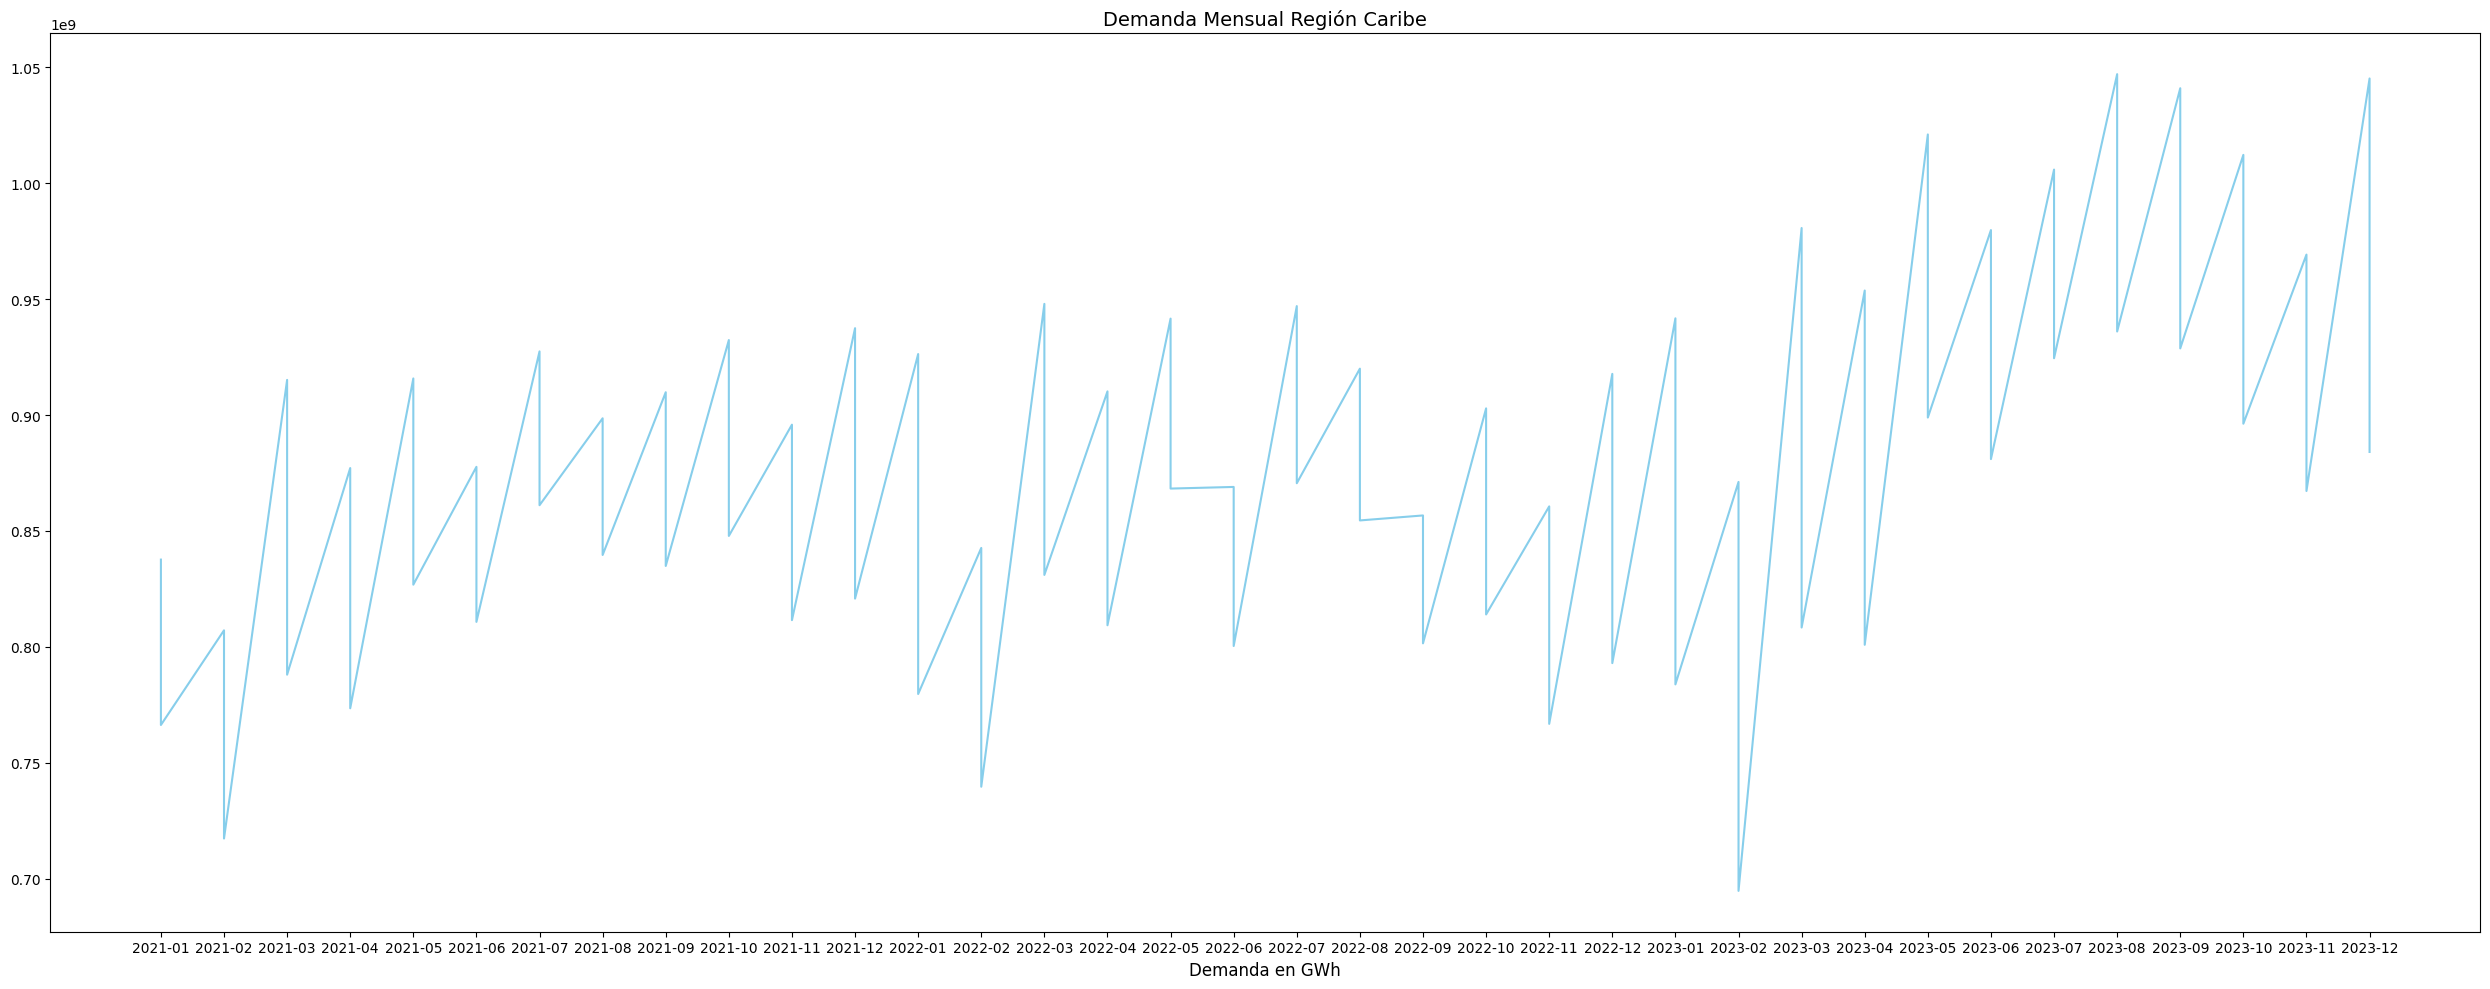

In [5]:
%matplotlib inline

#df_demanda_mensual = df_demanda_mensual.reset_index()

df_region['Mes'] = df_region['Date'].dt.strftime('%Y-%m')

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(25, 10))

# Graficar la demanda mensual en un gráfico de barras horizontales
ax.plot(df_region['Mes'], df_region['demanda_diaria'], color='skyblue')

# Añadir etiquetas de los ejes
ax.set_xlabel('Demanda en GWh', fontsize=12)
#ax.set_ylabel('Región', fontsize=12)

# Añadir título al gráfico
ax.set_title('Demanda Mensual Región Caribe', fontsize=14)

# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Demanda Diaria (Entre los Años 2021 y 2023)**

In [6]:
# Asegúrate de que la columna 'Date' esté en formato datetime
df_demanda['Date'] = pd.to_datetime(df_demanda['Date'])

# Suma de la demanda por horas (diaria)
df_demanda['demanda_diaria'] = df_demanda.sum(axis=1, skipna=True, numeric_only=True)

# Agrupar por mes y sumar la demanda diaria
df_demanda_diaria = df_demanda.groupby([pd.Grouper(key='Date', freq='D'), 'Values_code'])['demanda_diaria'].sum() 

df_demanda_diaria = df_demanda_diaria.reset_index()

# Definir la región específica a seleccionar
regiones_diario = ['CARIBE MAR', 'CARIBE SOL']

# Filtrar el DataFrame por la región específica
df_region_diario = df_demanda_diaria[df_demanda_diaria['Values_code'].isin(regiones_diario)]

Función Filtro de Fechas

In [7]:
# Función de filtro de fechas corregida
def fecha_t (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(['CARIBE MAR', 'CARIBE SOL']))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['demanda_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=True)
    
    return df_combinado


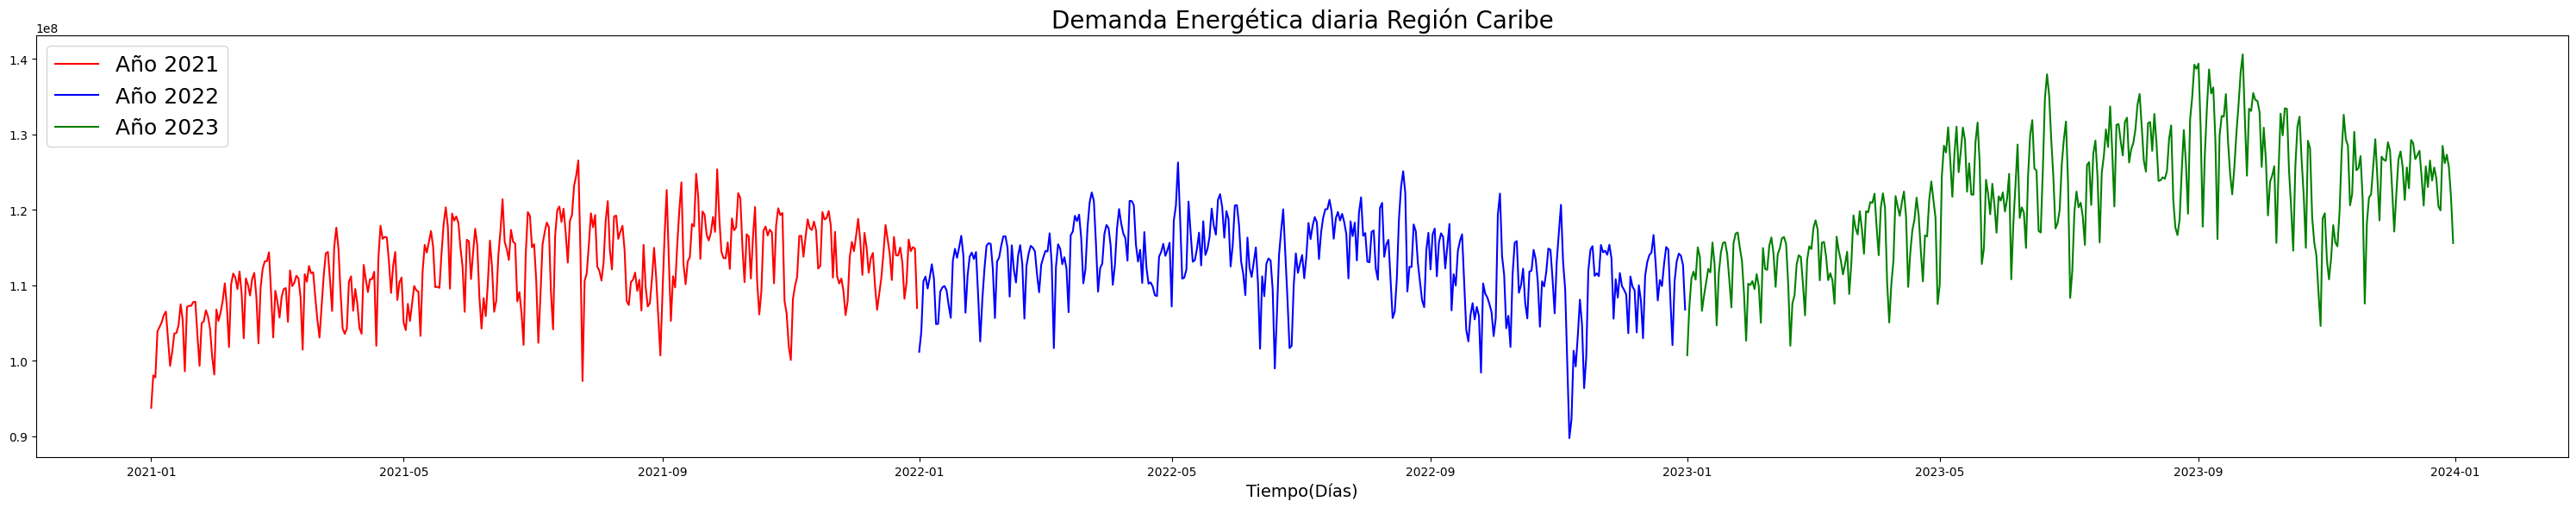

In [325]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_t('2021-01-01','2021-12-31').index, fecha_t('2021-01-01','2021-12-31')['demanda_diaria'], color="r", label='Año 2021')
ax.plot(fecha_t('2022-01-01','2022-12-31').index, fecha_t('2022-01-01','2022-12-31')['demanda_diaria'], color="b", label='Año 2022')
ax.plot(fecha_t('2023-01-01','2023-12-31').index, fecha_t('2023-01-01','2023-12-31')['demanda_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)

# Añadir título al gráfico
ax.set_title('Demanda Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [8]:
# Función de filtro de fechas corregida
def fecha_f (ini, fin):
    # Filtrar el DataFrame por el rango de fechas y las regiones específicas
    df_filtrado = df_region_diario[(df_region_diario['Date'] >= ini) & 
                                   (df_region_diario['Date'] <= fin) & 
                                   (df_region_diario['Values_code'].isin(['CARIBE MAR', 'CARIBE SOL']))]

    # Sumar la demanda diaria de ambas regiones en cada fecha
    df_combinado = df_filtrado.groupby('Date')['demanda_diaria'].sum().reset_index()

    # Establecer 'Date' como índice
    df_combinado.set_index('Date', inplace=False)
    
    return df_combinado

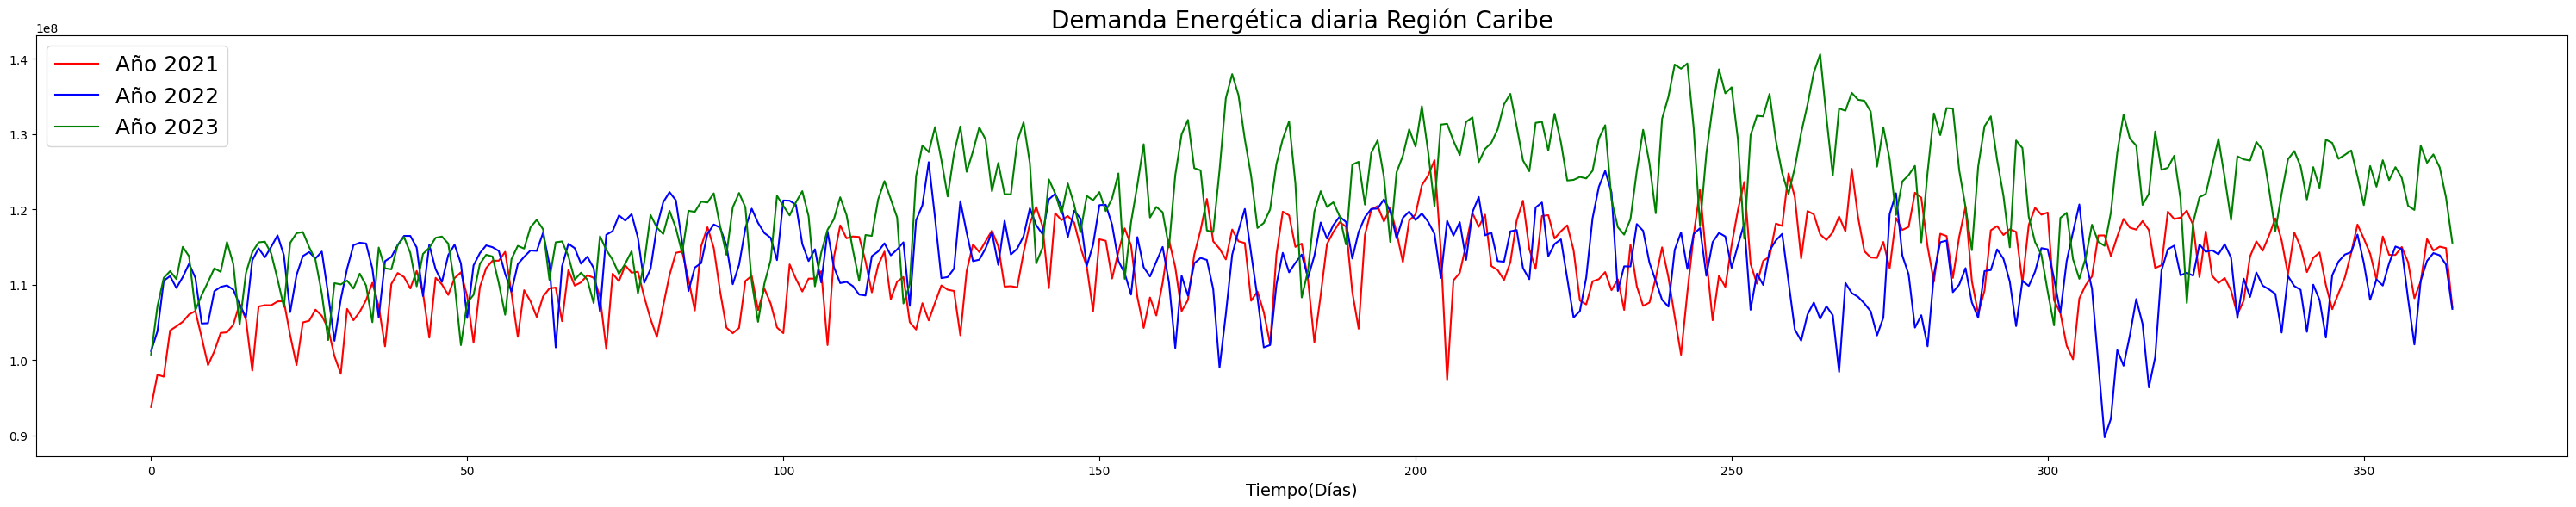

In [9]:
# Crear la figura y el eje
fig, ax = plt.subplots(1,1, figsize=(30, 6))


#for region in regiones_especificas_2021:

ax.plot(fecha_f('2021-01-01','2021-12-31').index, fecha_f('2021-01-01','2021-12-31')['demanda_diaria'], color="r", label='Año 2021')
ax.plot(fecha_f('2022-01-01','2022-12-31').index, fecha_f('2022-01-01','2022-12-31')['demanda_diaria'], color="b", label='Año 2022')
ax.plot(fecha_f('2023-01-01','2023-12-31').index, fecha_f('2023-01-01','2023-12-31')['demanda_diaria'], color="g", label='Año 2023')

# Añadir etiquetas de los ejes
ax.set_xlabel('Tiempo(Días)', fontsize=14)

# Añadir título al gráfico
ax.set_title('Demanda Energética diaria Región Caribe', fontsize=20)
ax.legend(fontsize=18)
# Ajustar la rotación de las etiquetas del eje y para mejor legibilidad
plt.yticks(rotation=0)

# Ajustar los márgenes
plt.tight_layout()

# Mostrar el gráfico
plt.show()

